<a href="https://colab.research.google.com/github/arnabmondal306/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the Project:**

Welcome to the realm of hands-on machine learning! In this open-ended ML Case Study, you have the opportunity to explore the vast landscape of machine learning applications across diverse industries. Your mission is to select one project from the list of projects given below in the cheat sheet or propose your own project idea that aligns with your interests and aspirations. This project is your canvas to apply your machine learning skills, experiment with various algorithms, and demonstrate your ability to tackle real-world challenges using data-driven insights. Through this project, you'll showcase your autonomy, creativity, and technical prowess as you contribute to shaping the future with data-driven solutions.

# **Skills Required:**



*   Proficiency in Python programming.
*   Familiarity with data manipulation libraries (e.g., pandas,numpy).
*   Knowledge of data visualisation tools (e.g., matplotlib, seaborn).
*   Understanding of machine learning concepts and clustering algorithms (e.g., K-means).
*   Ability to analyse and interpret data insights.
*   Strong report writing and presentation skills.







# **Rubrics for Assessment:**

* Data Exploration and Preprocessing: Correct loading of data and handling of missing values. Effective identification and handling of outliers if present.  
*  Feature Engineering: Appropriate calculation of metrics and creation of new features. Clear explanations for the chosen feature engineering strategies.
* Customer Segmentation: Proper selection and application of the clustering algorithm. Clear justification for the chosen number of clusters. Accurate visualisation of customer segments.
* Interpretation and Analysis: Thorough analysis of customer segments' characteristics. Meaningful insights and observations drawn from the analysis. Demonstration of critical thinking and depth of understanding.
* Recommendations: Relevant and actionable recommendations for marketing strategies. Alignment of recommendations with the analysis.
* Visualisationsand Reporting: Effective visualisations that enhance the understanding of insights. Clear, concise, and well-structured report or presentation.







# **Car Price Prediction**

In today's fast-paced world, the automotive industry is constantly evolving, with new models and technologies emerging regularly. As a result, car prices can vary greatly, and understanding the factors that influence these prices is crucial for both buyers and sellers. The Car Price Prediction Machine Learning project aims to address this challenge by leveraging the power of ML to forecast car prices accurately.

Whether you are in the market to purchase a new vehicle or looking to sell your current one, predicting the fair market value of a car can be a complex task, influenced by a multitude of variables such as make, model, year, mileage, and additional features. This project harnesses the capabilities of machine learning to provide a data-driven solution that enhances pricing transparency and empowers consumers and industry professionals alike.

By exploring historical car sales data and employing advanced machine learning techniques, our Car Price Prediction project aims to provide a reliable tool for estimating car prices, taking into account a wide array of features that influence the market value of vehicles. We'll delve into the world of regression algorithms, data preprocessing, feature engineering, and model evaluation to build a robust and accurate car price prediction system.









# **Aim**:-

With this project, we aim to simplify the car buying and selling process, allowing consumers to make informed decisions and enabling dealers and manufacturers to optimize pricing strategies. The journey begins by collecting and analyzing relevant data, then proceeds to the development of predictive models that offer insights into car pricing trends. Ultimately, the project promises to be a valuable resource for anyone navigating the dynamic and competitive automotive marketplace.

# **Key Components of the Problem:**



* **Data Collection:** Gather a dataset that includes historical data on used cars, including details like make, model, year of manufacture, mileage, engine specifications, fuel type, transmission type, and price.
* **Data Preprocessing:** Clean and preprocess the dataset, handling missing values, outlier detection and treatment, feature engineering, and data normalization or scaling.
* **Feature Selection:** Identify the most relevant features that have a significant impact on the car's price and eliminate irrelevant or redundant features.

* **Model Selection:** Choose an appropriate machine learning algorithm for regression tasks, such as linear regression, decision tree regression, random forest regression, or gradient boosting regression.

* **Model Training:** Train the selected machine learning model on the preprocessed dataset, using a portion of the data for training and the remainder for validation and testing.
* **Model Evaluation:** Assess the model's performance using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. The model should be evaluated on its ability to make accurate price predictions.







# **Importing all the necessary libraries:-**

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


**Loading the dataset**

In [ ]:
filepath="/content/drive/MyDrive/car_price_prediction.csv"
df=pd.read_csv(filepath)

# **Explore Data🔎 and Data Cleaning 🧹**

In [ ]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.tail(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,04-May,Left wheel,White,12


In [ ]:
df.shape

(19237, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [ ]:
# Checking Duplication
df.duplicated().sum()

313

Here we found that the dataset has 313 duplicate values, hence have decided to drop these duplicate values

In [ ]:
# droping duplicate values
df.drop_duplicates(inplace= True)

In [ ]:
# checking Missing value
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

The good thing here is that we don't have any Null values

Checking number of Unique values in all the columns

In [ ]:
# Checking the number of unique values of each column
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [ ]:
# Checking statistic of dataset
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


**Have decided to Drop the ID and Doors columns because it will not provide any information for our model**

In [ ]:
df=df.drop(['ID','Doors'],axis=1)

**Making changes in the column "Levy"**

At the time of looking into the Levy column, i find that in number of places "-"is present

we need to replace  "-"  with 0, to convert the type of this column to float

In [ ]:
# Replacing '-' with 0
df['Levy']=df['Levy'].replace('-','0')

In [ ]:
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float')

**Prod. year column is not useful in our analysis**

So we will first find the age of the car then add a new column to the DataFrame

And then drop Prod. year column

In [ ]:
# using date time function for calculating the Age
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']

In [ ]:
df = df.drop('Prod. year',axis=1)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,Left wheel,Silver,4,9


In Mileage column in number of places 'km' is present

From the Mileage column we need to strip 'km' in them, and convert the type of this column to integer

In [ ]:
# Replacing 'Km' with ''
df['Mileage'] =df['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
df.Mileage = df.Mileage.astype('Int64')

In [ ]:
df.Mileage.head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: Int64

In engine volume in number of places 'turbo' word is present

From engine volume, we need to strip the 'turbo' word in them, and convert it's type to float

In [ ]:
# Replacing 'Turbo' with ''
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
df['Engine volume'] = df['Engine volume'].astype('float64')

In [ ]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,9


# **Analysis📝 & Visualiation📊**

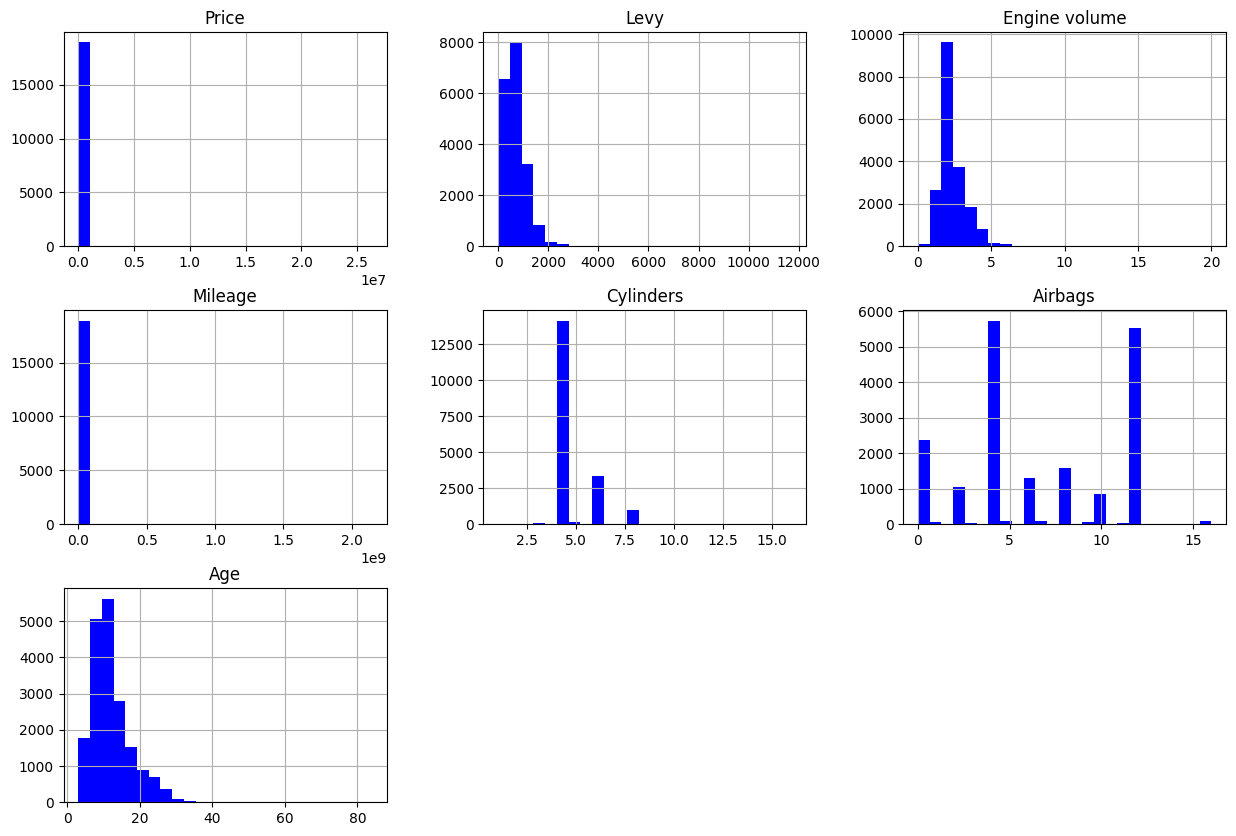

In [ ]:
df.hist(bins=25,figsize=(15,10),color='blue')
plt.show()

we found:🔎

1- In Levy column: Most of the values are between 0 and 200

2- Most values in Engine volume range between 1 to 5

3- Mileage for most cars are 0.0 (most cars are new)

4- In Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- In Age column: Most cars are 13 years old, but we have some very old cars

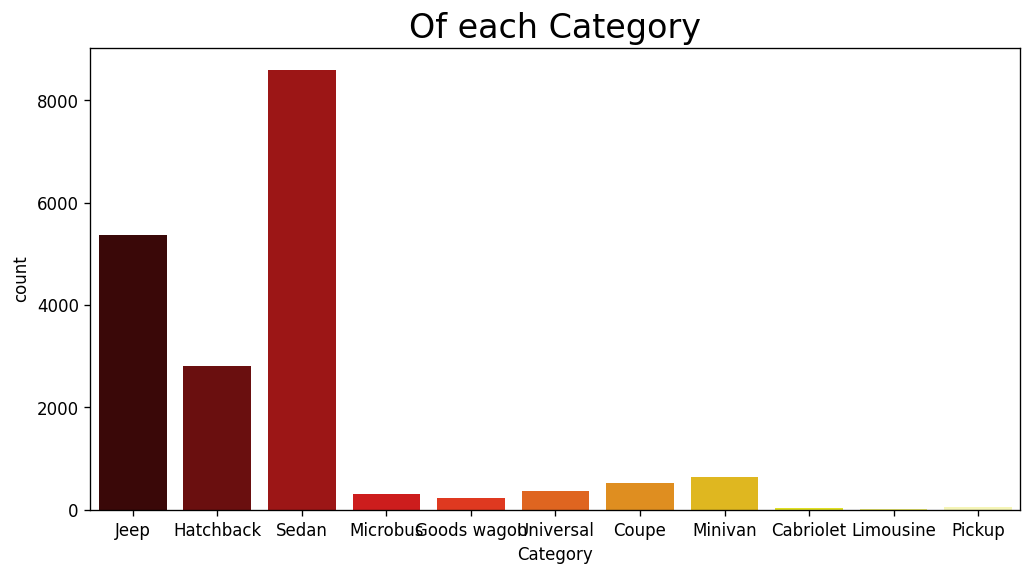

In [ ]:
plt.subplots(figsize=(10,5), dpi=120)
sns.countplot(data= df, x='Category',palette='hot')
plt.title("Of each Category",fontsize=20)
plt.show()

**Most types of Categories are Sedan, Hatchback, and Jeep.**

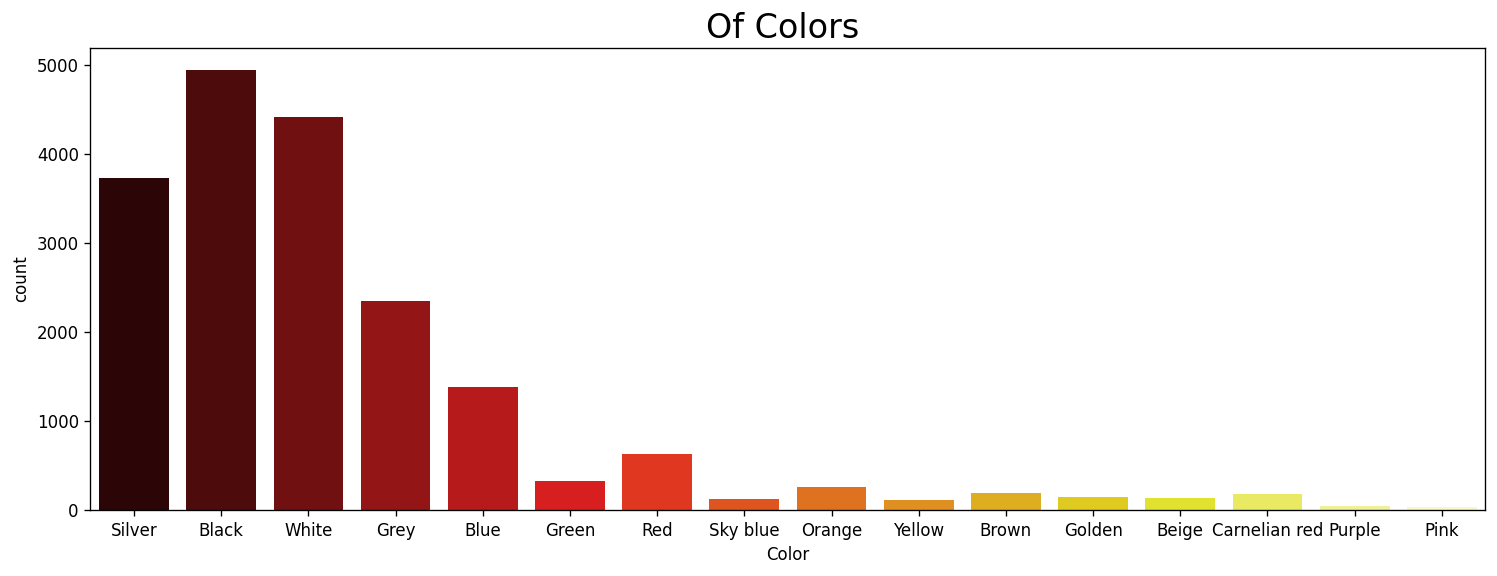

In [ ]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Color',palette='hot')
plt.title("Of Colors ",fontsize=20)
plt.show()

**The most sold car colors are Black, Silver,White and Grey.**

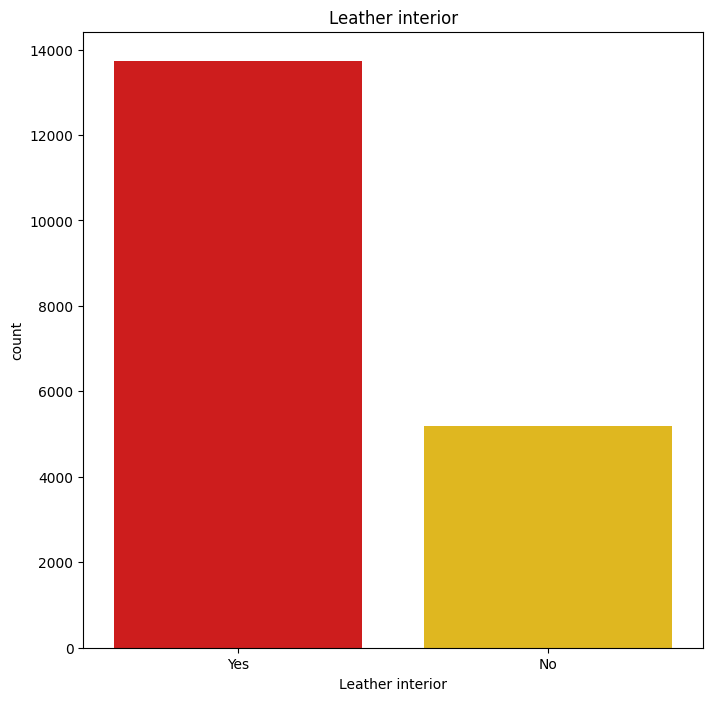

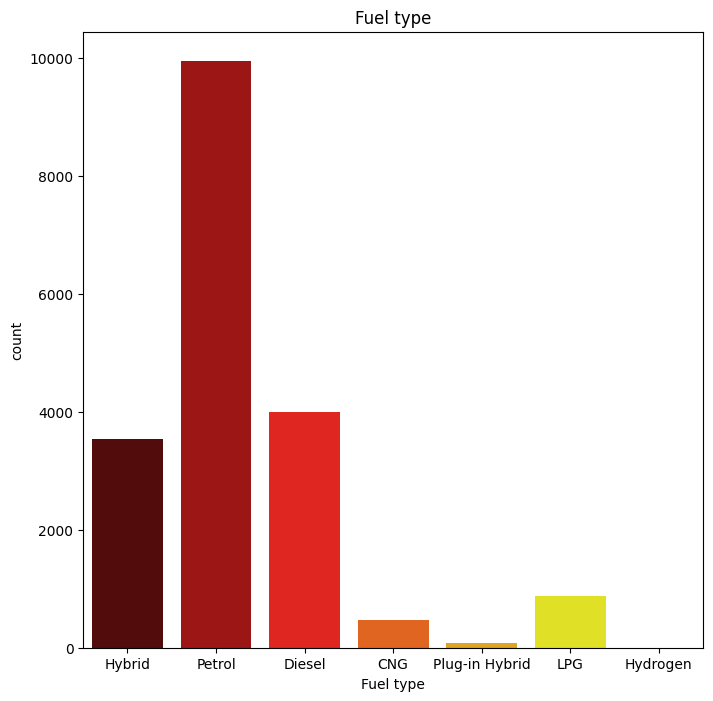

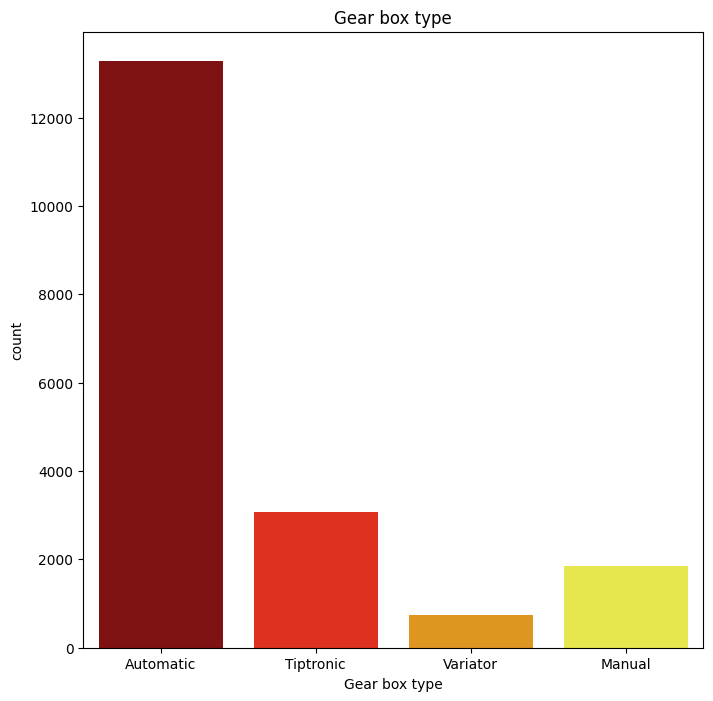

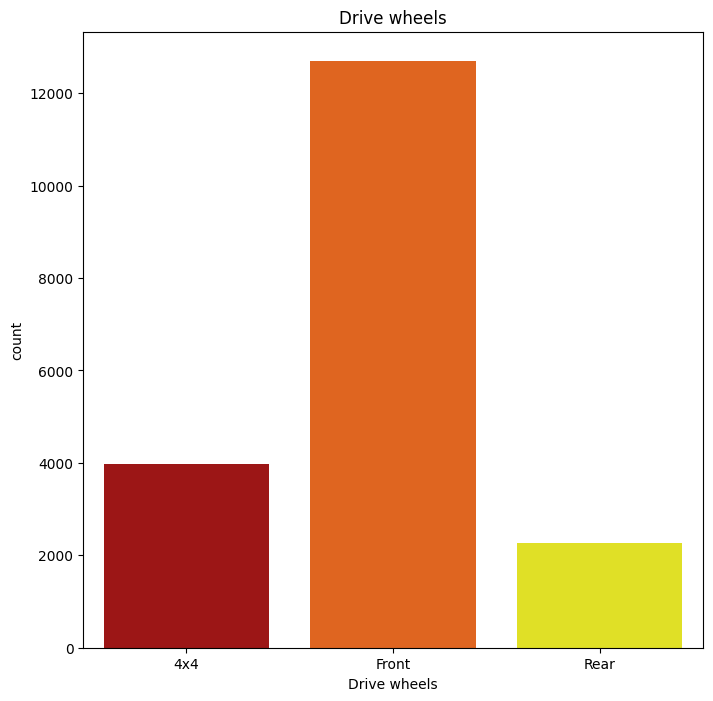

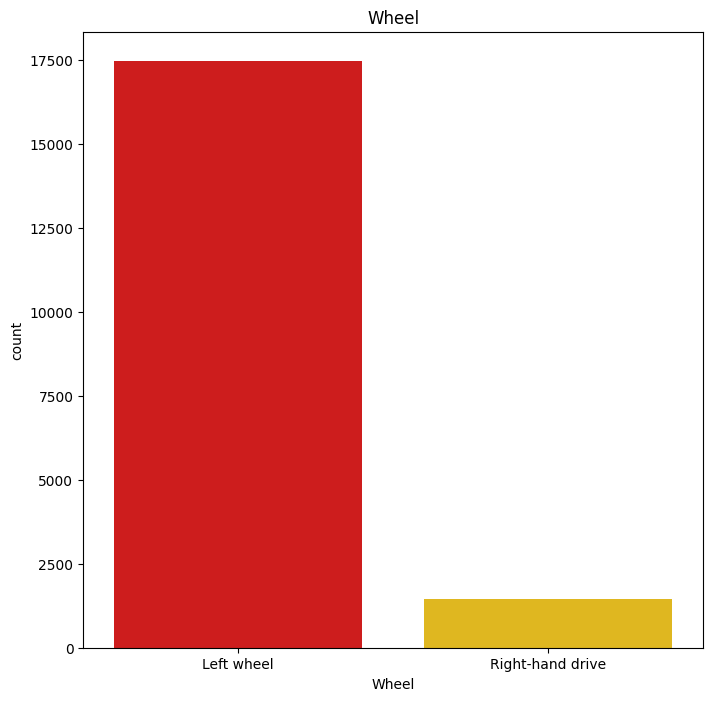

In [ ]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(8,8))
    #top10 = data[col].value_counts()[:10]
    sns.countplot(data=df,x=col,palette='hot')
    plt.title(col)
    plt.show()

**we found:🔎**


*   Most of the cars have leather interior
*   petrol as a fuel is been used in most of the cars

    Diesel and Hybrid are also very prominent among the cars

    Where as LPG, Plug in Hybrid and CNG are not much used as fuel in the cars


*   Maximum of the cars have automatic gear box

    Where as very less number of cars have gearbox type as tiptronic, Variator, Manual
*   Most of the cars have front wheel drive


*   And maximum cars are left hand drive








# **Finding top car manufacturers:-**

In [ ]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

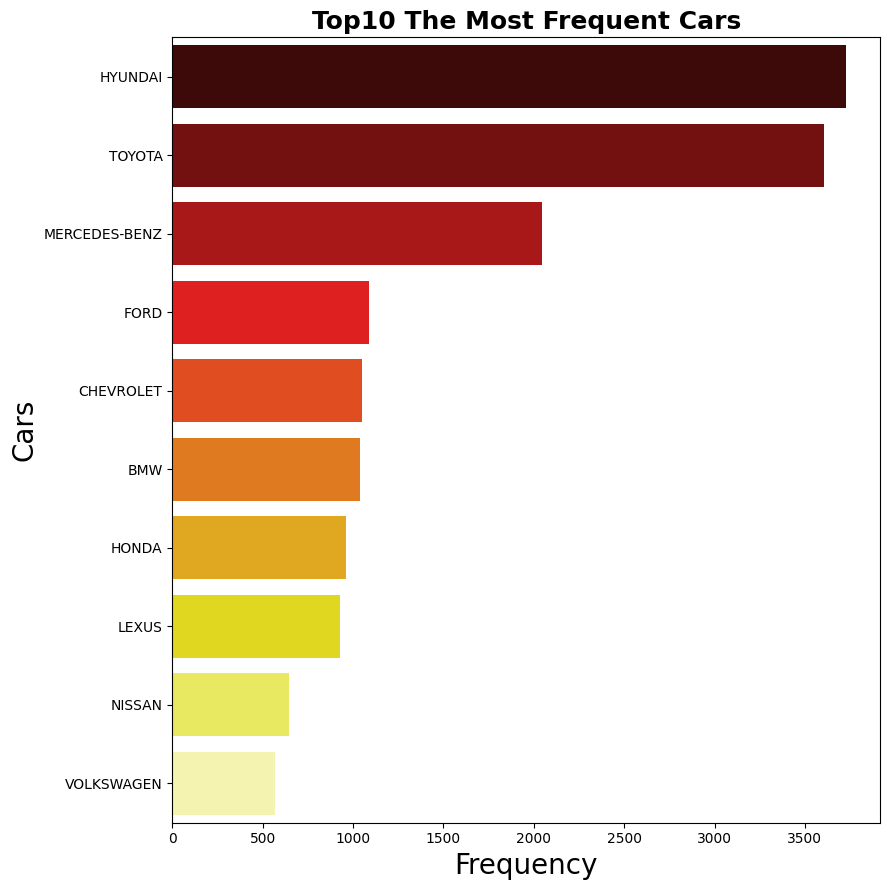

In [ ]:
plt.figure(figsize=(9, 9))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

**Hyndai and Toyota are the top among the car manufacturers, Whereas Nissan and Volkswagen have the least number of cars**

# **Average price of the top car brands:-**

In [ ]:
# Calculate average price for top 10 cars
top_10_cars_means_prices = [df[df['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]

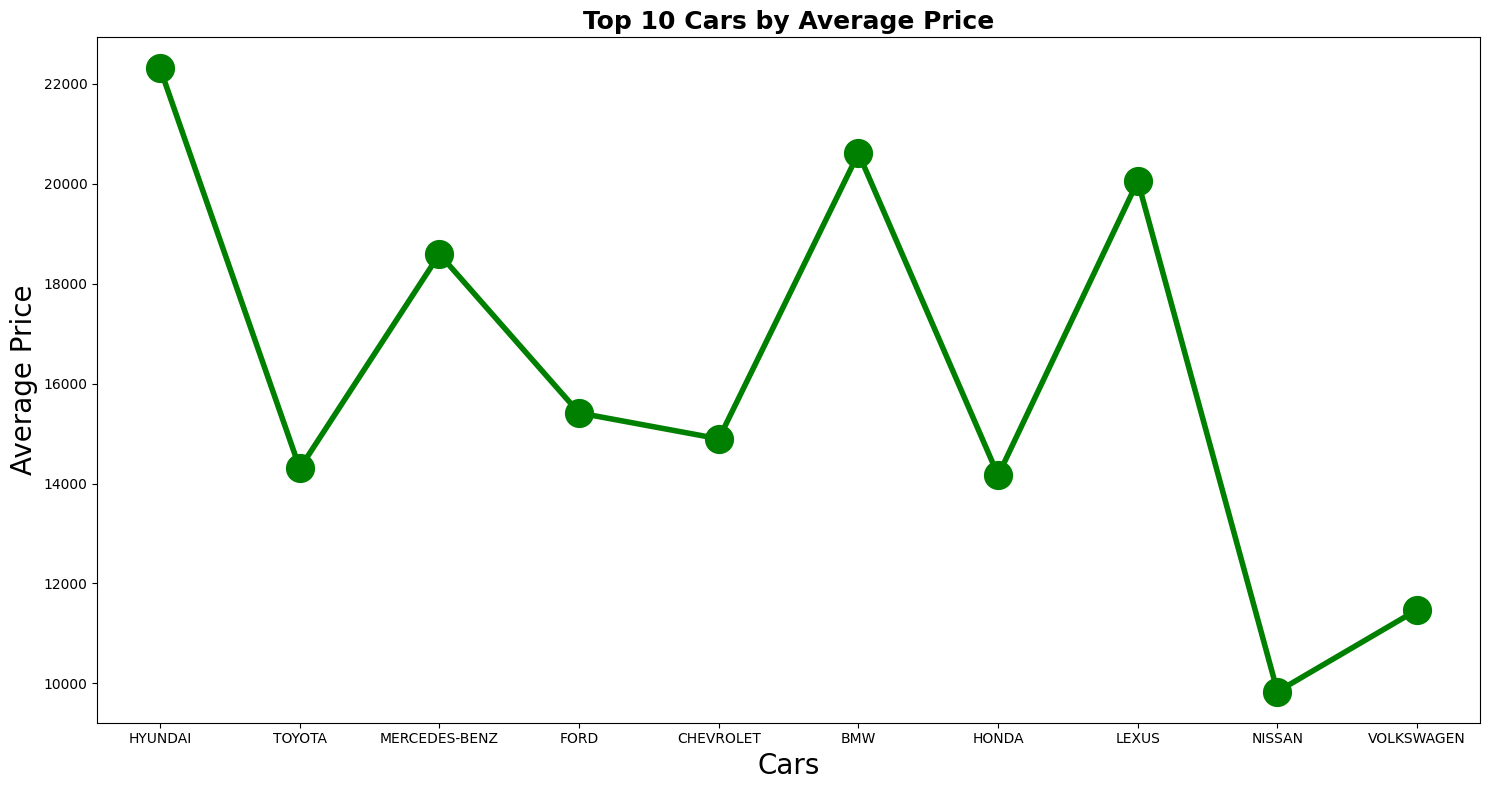

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='g',
         linewidth = 4,marker='o',markersize = 20)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

From this graph we can say that Hyundai's average price is the highest and one of the main reason for it is that Hyundai has also been the top car manufacturer

**Checking if colour of the car plays any role in the price**

<Axes: xlabel='Price', ylabel='Levy'>

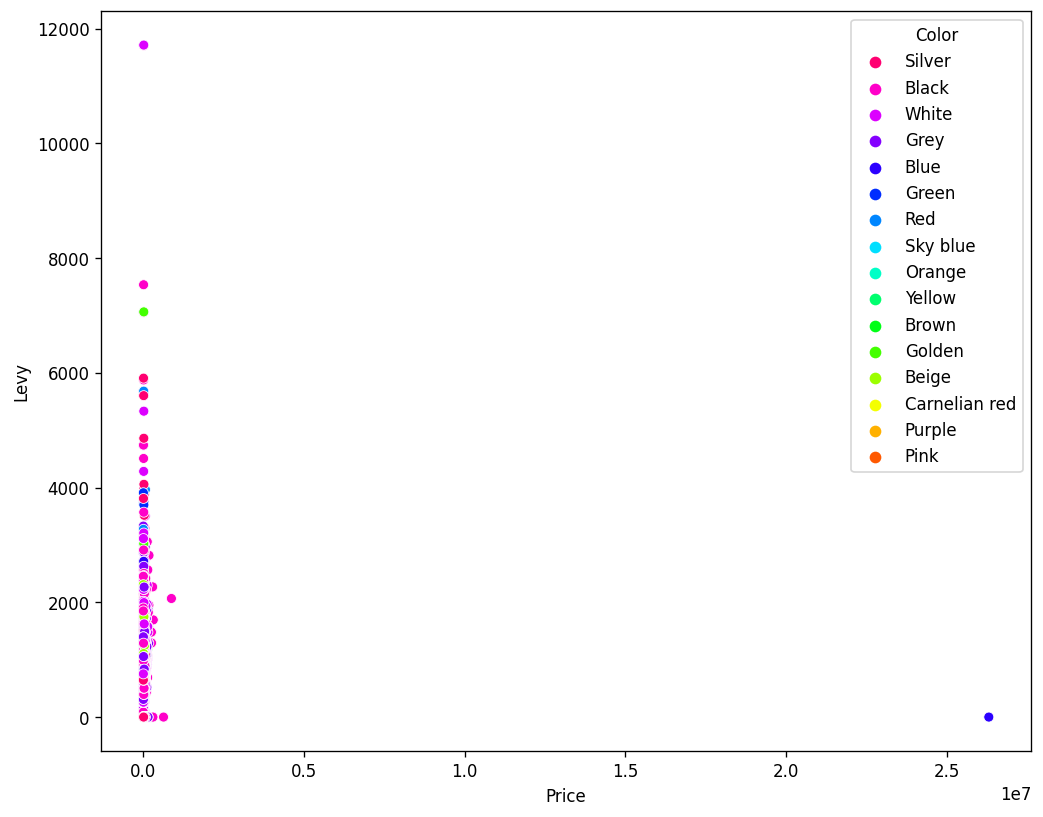

In [ ]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Color", palette="hsv_r")

We found that here **Color doesn't affect on car's price**

# **Correlation graph**

In [ ]:
# Correlation Analysis
cor= df.select_dtypes(exclude=object).corr()
cor

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


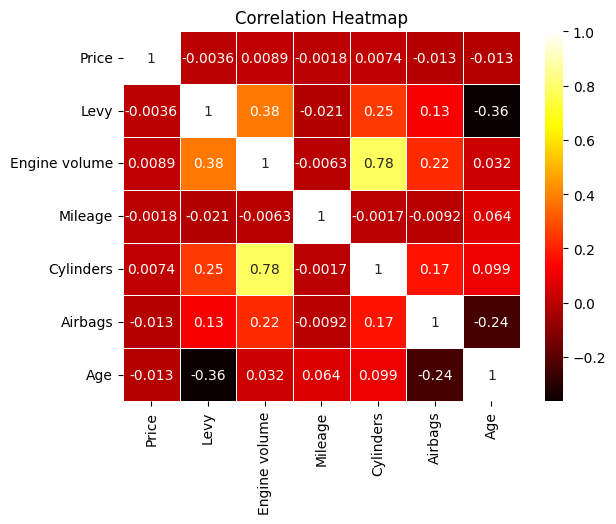

In [ ]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

# **Handling Outliers:-**

In [ ]:
# Lets define the numeric columns
numeric_data = df.select_dtypes(exclude=object)

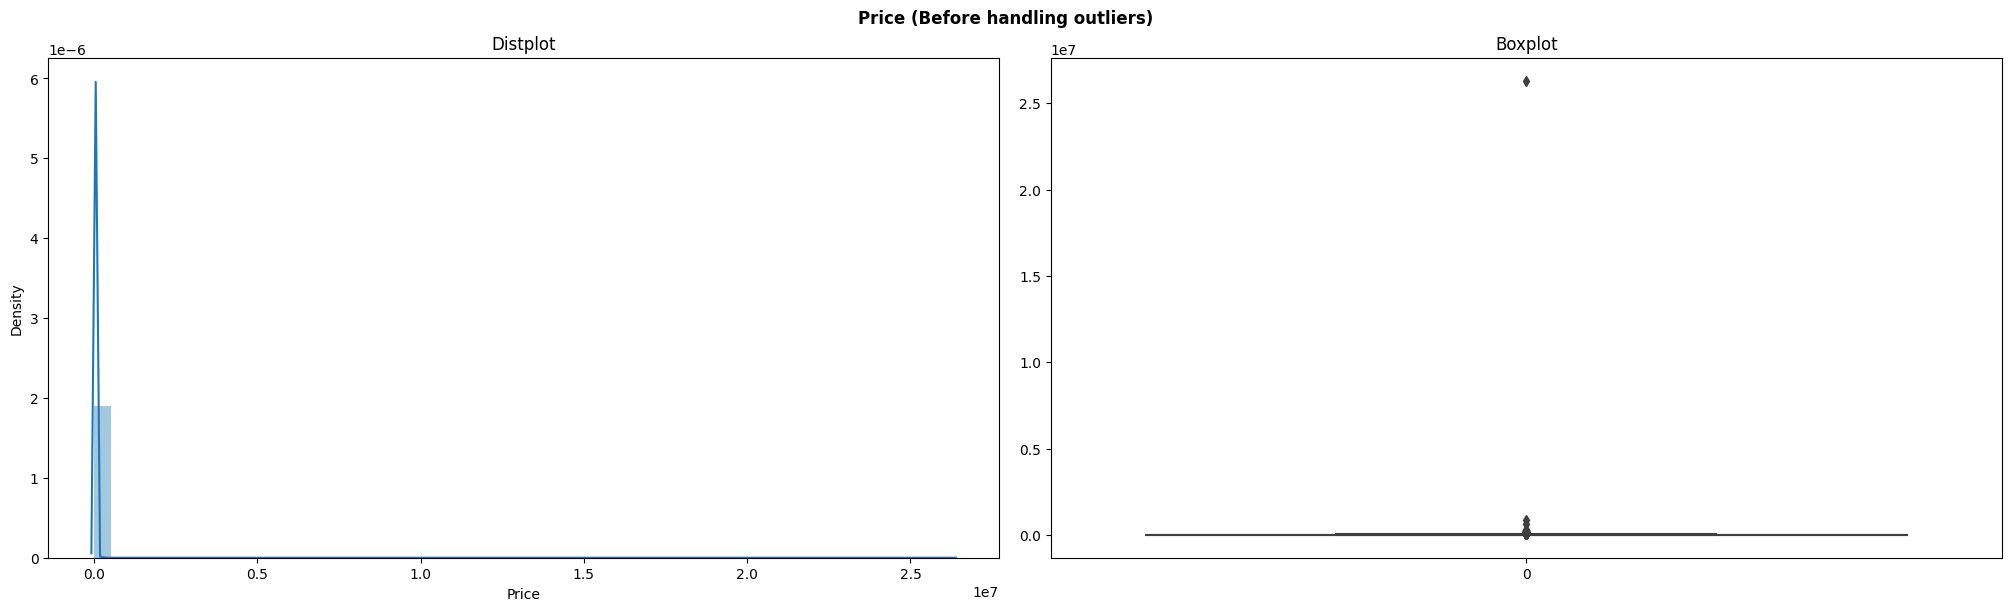

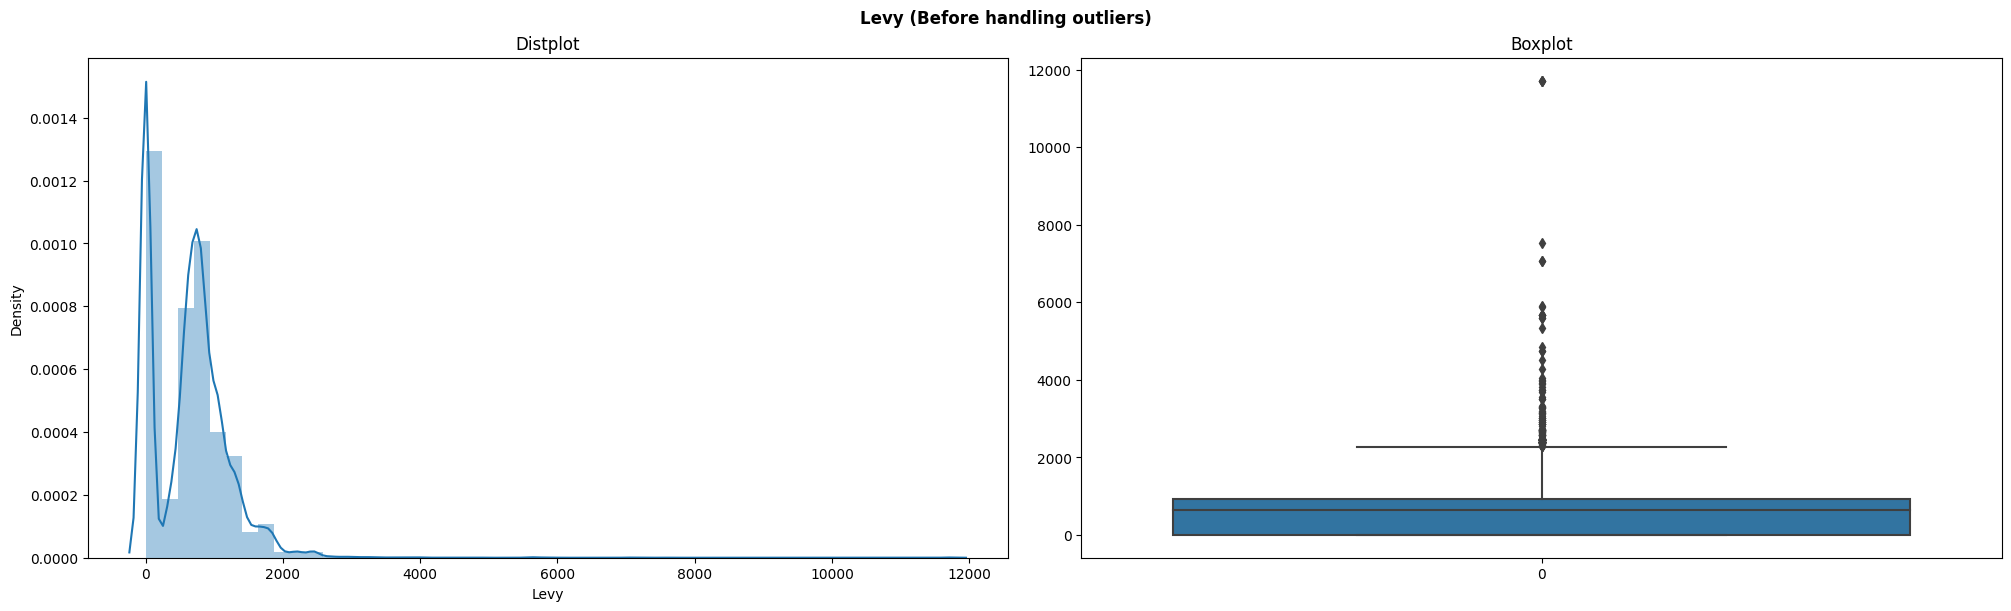

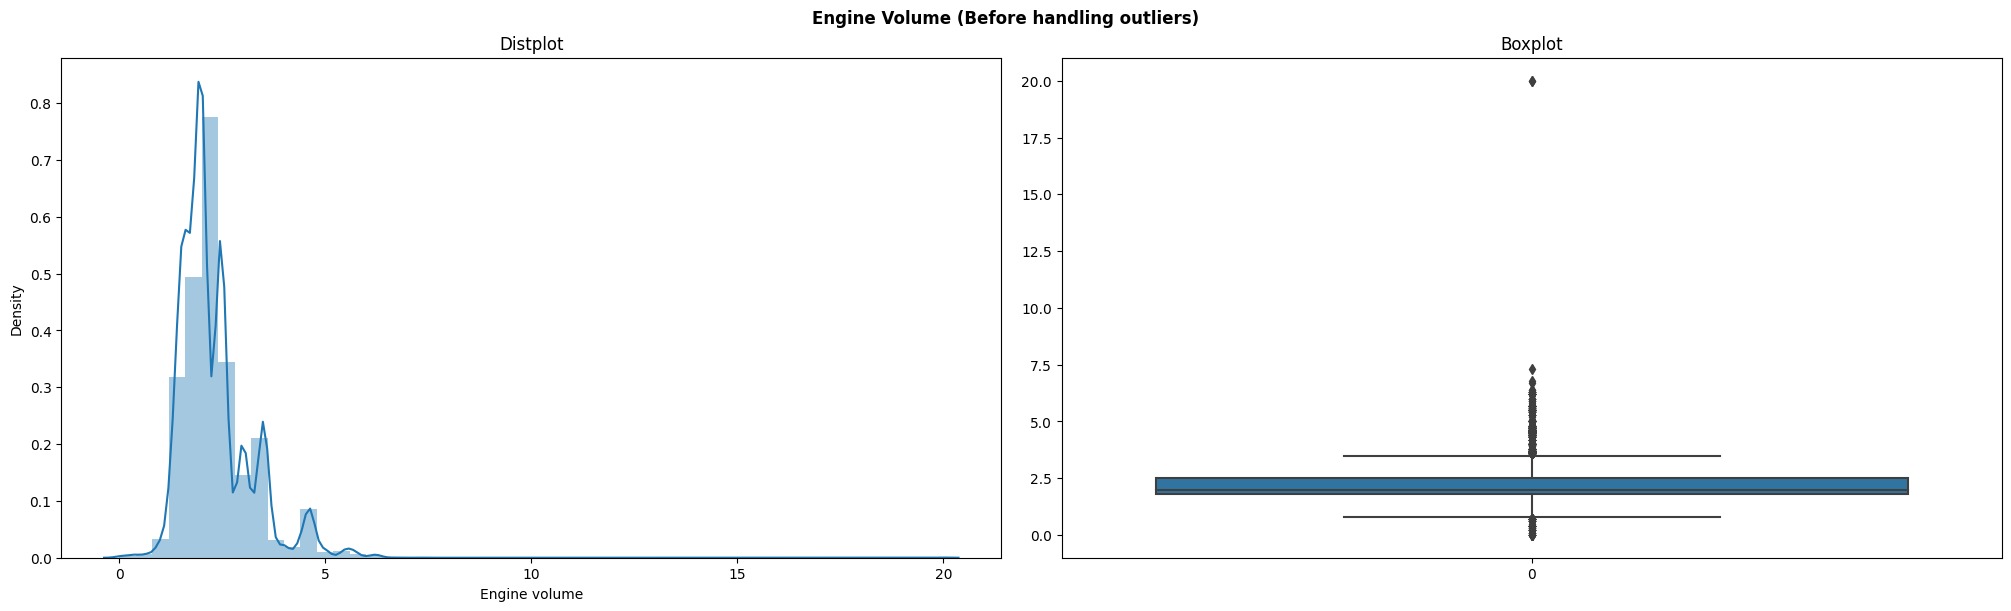

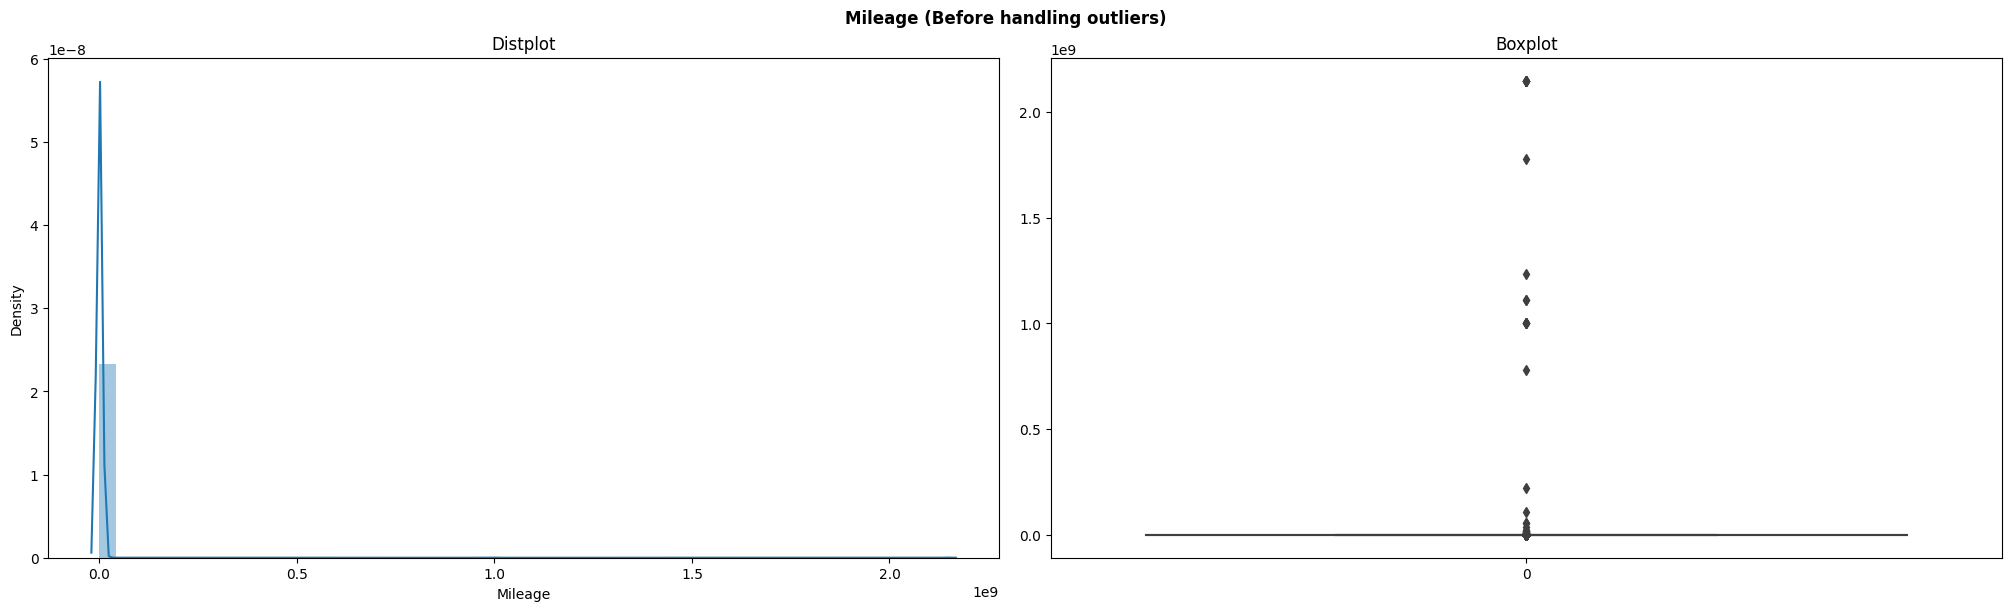

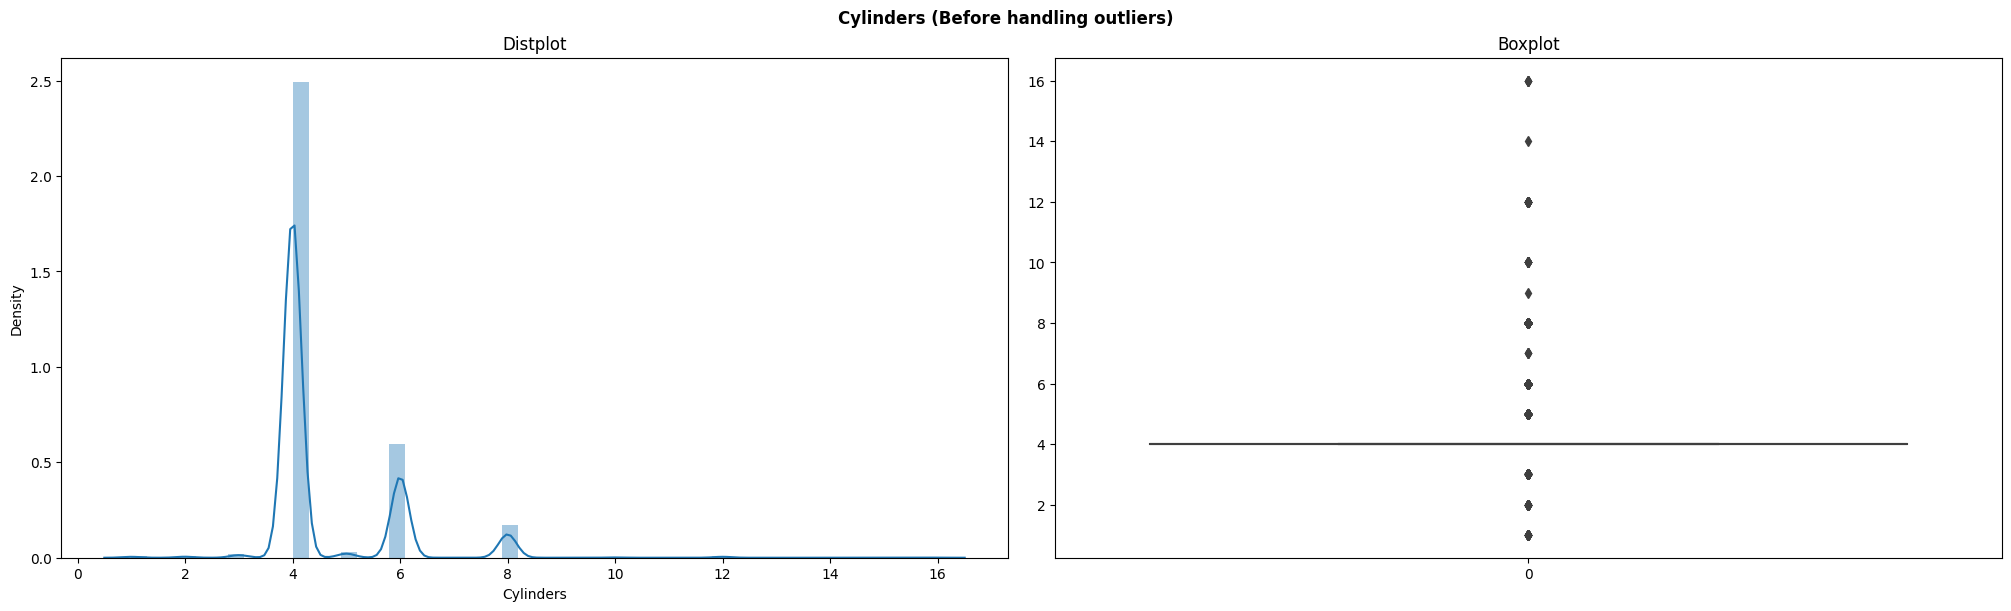

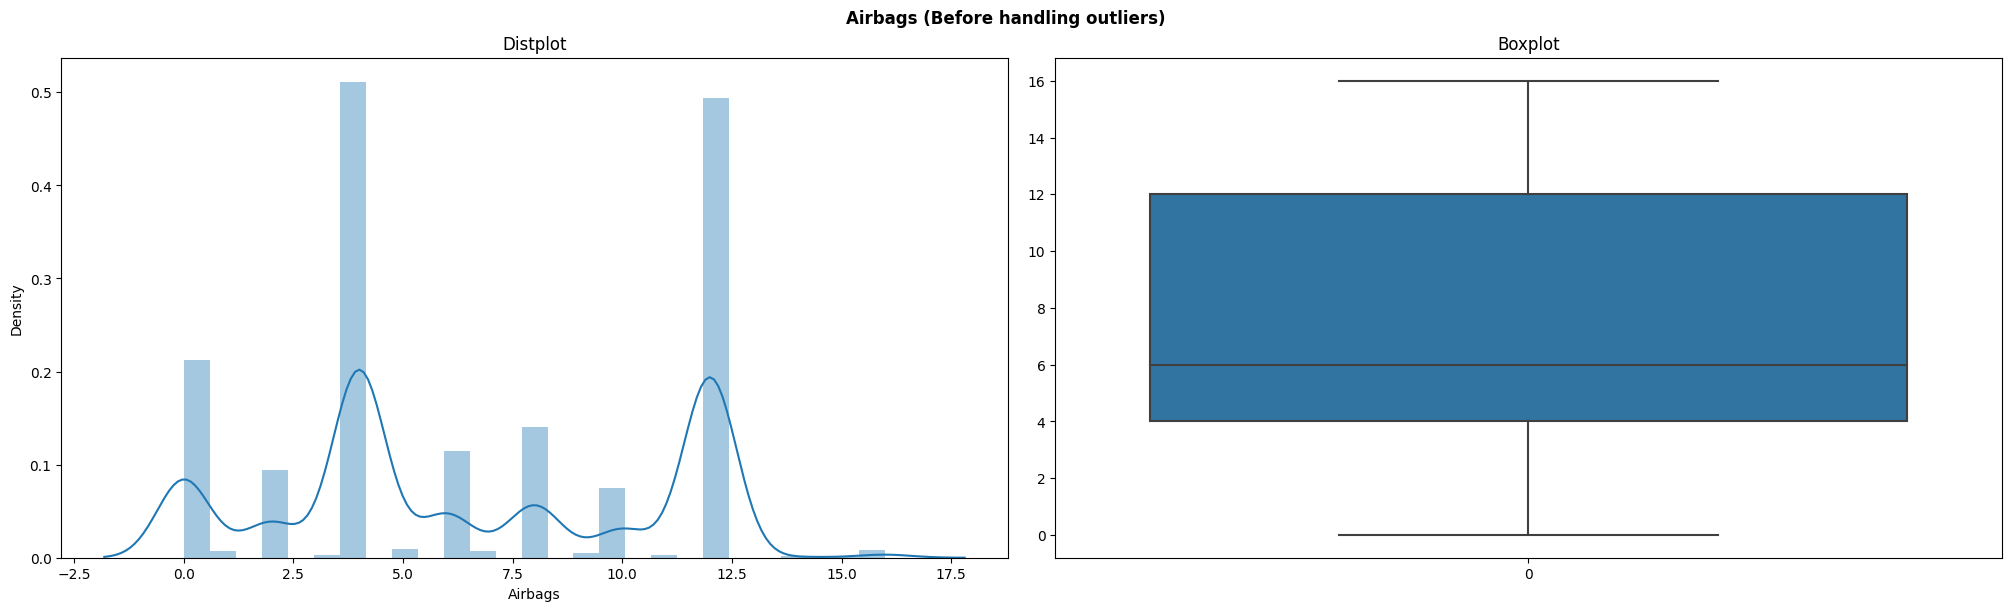

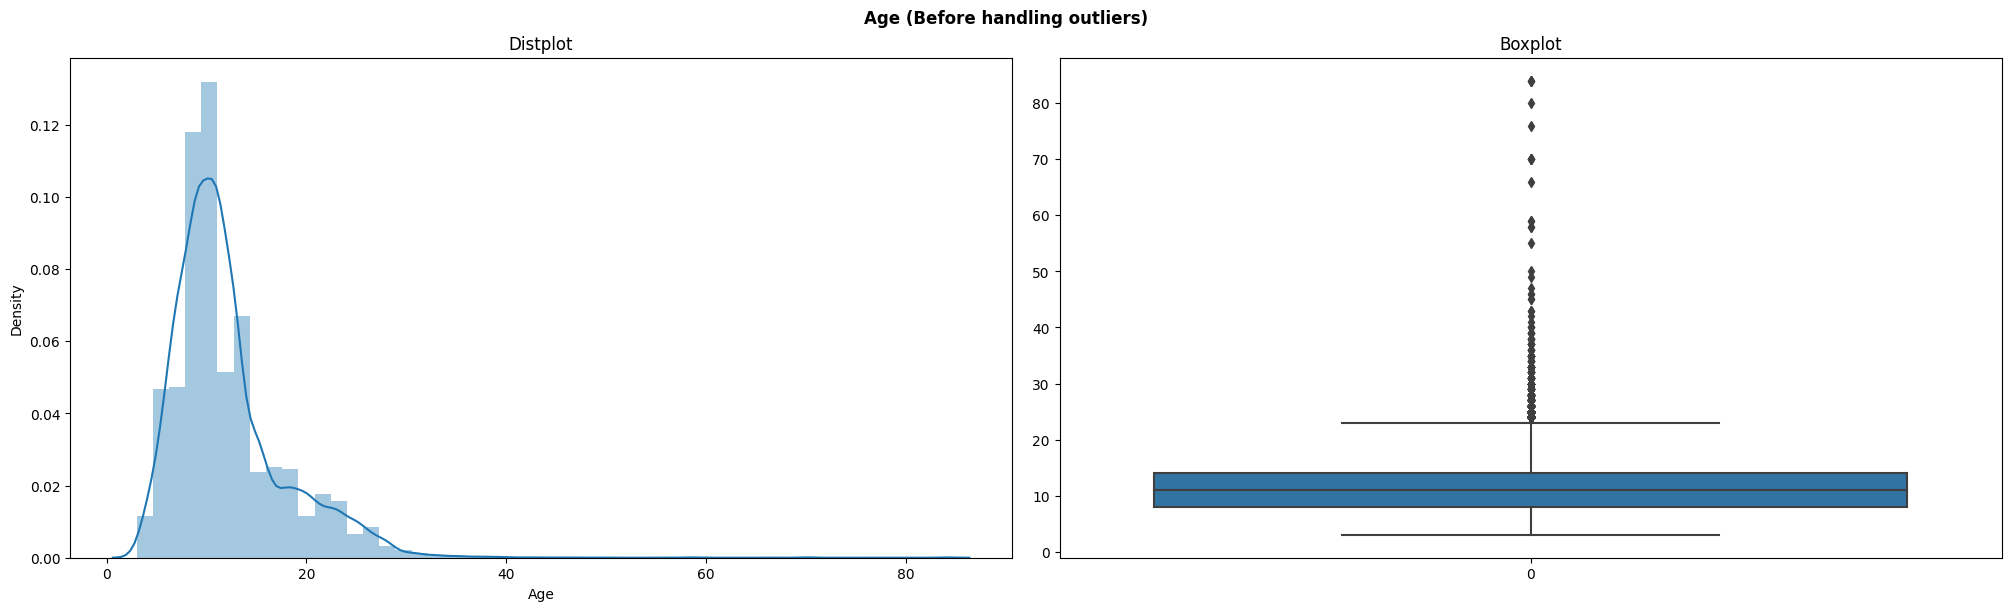

In [ ]:
#Plotting Graphs Before treating outliers of continous features
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [ ]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2

    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")

Total Outliers in Price are :18924---100.0%
Total Outliers in Levy are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [ ]:
if outlier>0:
    df = df.loc[(df[col]<=high) & (df[col]>=low) ]

In [ ]:
df.shape

(842, 16)

In [ ]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 15 to 19196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             842 non-null    int64  
 1   Levy              842 non-null    float64
 2   Manufacturer      842 non-null    object 
 3   Model             842 non-null    object 
 4   Category          842 non-null    object 
 5   Leather interior  842 non-null    object 
 6   Fuel type         842 non-null    object 
 7   Engine volume     842 non-null    float64
 8   Mileage           842 non-null    Int64  
 9   Cylinders         842 non-null    int64  
 10  Gear box type     842 non-null    object 
 11  Drive wheels      842 non-null    object 
 12  Wheel             842 non-null    object 
 13  Color             842 non-null    object 
 14  Airbags           842 non-null    int64  
 15  Age               842 non-null    int64  
dtypes: Int64(1), float64(2), int64(4), object

# **Transforming Data**

**Using Encoder**

**Converting all object columns to numerical by label encoder (Because ML Model don't understand object columns)**

In [ ]:
obdata = df.select_dtypes(include=object)
numdata = df.select_dtypes(exclude=object)

In [ ]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])

In [ ]:
data = pd.concat([obdata,numdata],axis=1)

In [ ]:
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
15,30,23,3,1,3,0,1,0,14,549,1079.0,2.0,74146,4,12,5
36,30,24,3,0,3,2,1,0,11,51746,1077.0,2.0,10200,4,12,4
56,19,80,3,1,3,2,0,0,7,87112,0.0,2.0,5323,4,0,4
59,4,53,7,0,3,0,1,0,11,23521,781.0,1.4,22000,4,6,5
81,30,180,7,1,3,0,1,0,14,7527,830.0,1.5,27656,4,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,9,75,5,0,1,0,1,1,7,24000,2266.0,1.5,19000,4,0,5
19157,13,20,7,1,3,0,1,0,2,3607,1077.0,2.0,23474,4,12,4
19180,10,149,7,1,2,0,1,0,12,63886,1076.0,2.0,5305,4,4,3
19182,30,30,7,1,1,0,1,0,1,9722,609.0,2.5,127515,4,12,5


# *# Building ML Models:-*

**Here i am building 'LinearRegression', 'DecisionTreeClassifier',
 'RandomForestClassifier', 'GradientBoostingRegressor'  models**

**And using R2 and RMSE scores to evaluate the models**

In [ ]:
x= data.drop('Price',axis=1)
y= data['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)


In [ ]:
algorithm = ['LinearRegression','DecisionTree','RandomForest','GradientBoostingRegressor']
R2=[]
RMSE = []

In [ ]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [ ]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()


In [ ]:
models(model1)
models(model2)
models(model3)
models(model4)


The Score of Model is :0.48162737395538113
The Score of Model is :-1.2911904328721437
The Score of Model is :0.6605800296757085
The Score of Model is :0.5152908744089769


In [ ]:
df_1 = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df_1

,Algorithm,R2_score,RMSE
0,LinearRegression,0.481627,25718.064560
1,DecisionTree,-1.291190,54068.938824
2,RandomForest,0.660580,20810.664512
3,GradientBoostingRegressor,0.515291,24868.972985


**Using line graph to understand score of R2 for different models**

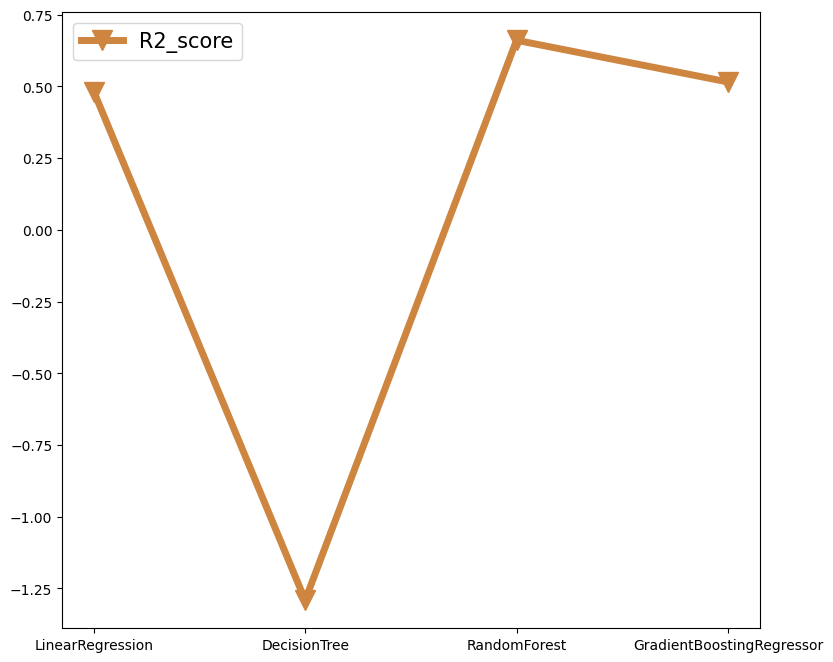

In [ ]:
fig = plt.figure(figsize=(9,8))
plt.plot(df_1.Algorithm,df_1.R2_score ,label='R2_score',lw=5,color='peru',marker='v',markersize = 15)
plt.legend(fontsize=15)
plt.show()

**Using line graph to understand score of RMSE for different models**

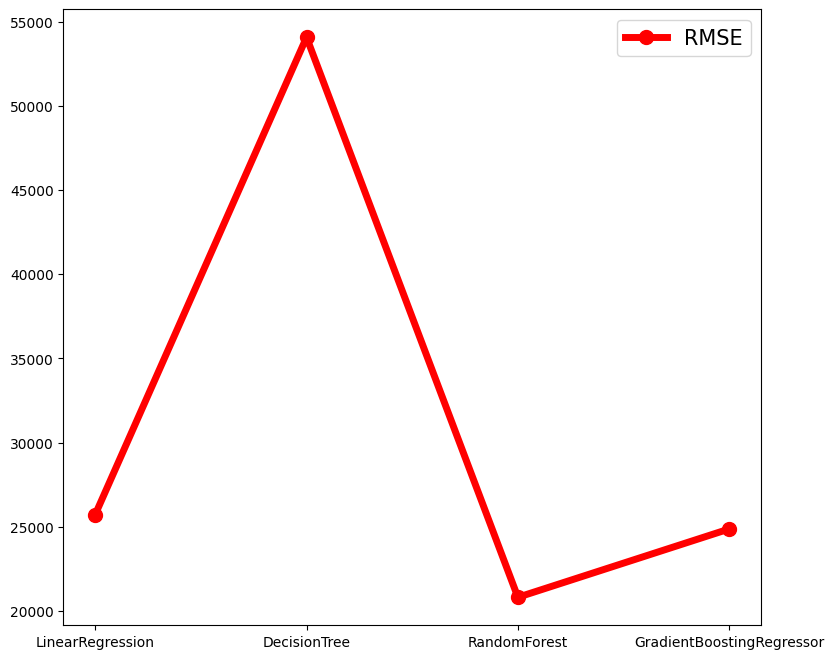

In [ ]:
fig = plt.figure(figsize=(9,8))
plt.plot(df_1.Algorithm,df_1.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()

# **Conclusion:-**

**Based on the obtained R2 score and RMSE (Root Mean Squared Error) values, the best model for car price prediction appears to be the "Random Forest." Here's why:**

**R2 Score:** The Random Forest has the highest R2 score of 0.660580. R2 score measures the proportion of the variance in the dependent variable (car prices) that is predictable from the independent variables in the model. A higher R2 score indicates a better fit of the model to the data.

**RMSE:** The Random Forest has the lowest RMSE value of 20810.664512. RMSE is a measure of the average prediction error in the model. A lower RMSE indicates better accuracy in predicting car prices.